Let $x, y$ be two independent random variable uniformly distributed on the square $A$ defined by $-1<x<1, -1<y<1$.

Consider the random variable
    $$
      S(x, y) =   \begin{cases}
                        4 & x^2+y^2 < 1 \\
                        0 & otherwise \\
                  \end{cases}
    $$


__1) Compute the probability distribution of S, its mean and it variance.__

Given independence and uniformity on $x$ and $y$, we have $P(x, y) = P(x)P(y) = \frac{1}{2} \frac{1}{2} = \frac{1}{4}$.

A) _PROBABILITY DISTRIBUTION_
    $$ 
    P_S(4) = \iint_A p(x,y) \cdot \delta\left(S(x,y) - 4\right) \,dx\,dy = \frac{1}{4} \cdot \iint_{x^2+y^2 < 1} \,dx\,dy = \frac{\pi}{4} 
    $$

Then:
    $$ 
    P_S(s) = \delta\left(s-4\right) \cdot \frac{\pi}{4} + \delta(s) \cdot \left(1-\frac{\pi}{4}\right)
    $$

B) _MEAN_
    $$
    \langle S \rangle = \sum_i s_i \cdot P_S(s) = \pi 
    $$

C) _VARIANCE_

We compute the mean of the square of $S$ first.
    $$
    \langle S^2 \rangle = \sum_i s_i^2 \cdot P_S(s) = 4 \pi 
    $$
It follows that the variance is:   
    $$
    \Delta = \langle S^2 \rangle - \langle S \rangle^2 = 4 \pi - \pi^2 = \pi\left(4 - \pi\right)
    $$



__2) Unbiased estimators of the mean and the variance of S__

Consider $\hat{m} = \frac{1}{N}\sum_i S_i$ and $\hat{\Delta} = \frac{1}{N-1} \sum_i S_i^2 - \hat{m}^2$ with $\{S_i\}_i$ being identifical and independent variables.


 A) _UNBIASEDNESS OF THE MEAN ESTIMATOR_
    $$
    \langle \hat{m} \rangle = \frac{1}{N}\sum_i \langle S_i \rangle = \frac{N}{N} \langle S \rangle = \langle S \rangle
    $$
    
 B) _UNBIASEDNESS OF THE VARIANCE ESTIMATOR_
    $$
    \langle \hat{\Delta} \rangle = \frac{1}{N-1} \sum_i \langle S_i^2 \rangle - \langle \hat{m}^2 \rangle = \frac{N}{N-1} \langle S^2 \rangle - \frac{N}{N-1}\langle \hat{m}^2 \rangle
    $$
    Let us compute $\langle \hat{m}^2 \rangle$ first.
    $$
    \begin{equation}
    \begin{split}
    \langle \hat{m}^2 \rangle & = \frac{1}{N^2}\sum_{i, j} \langle S_i S_j \rangle \\
        & = \frac{1}{N^2}\sum_{i=j} \langle S_i^2 \rangle + \frac{1}{N^2}\sum_{i \neq j} \langle S_i S_j \rangle \\
        & = \frac{1}{N}\langle S^2 \rangle + \frac{1}{N^2}\sum_{i \neq j} \langle S_i \rangle \langle S_j \rangle \\
        & = \frac{1}{N}\langle S^2 \rangle + \frac{1}{N^2}\sum_{i} \langle S_i \rangle \cdot \sum_{j} \langle S_j \rangle - \frac{1}{N^2}\sum_{i} \langle S_i \rangle^2 \\
        & = \frac{\Delta}{N} + \langle S \rangle^2 = \frac{\langle S^2 \rangle}{N} +\langle S \rangle^2 \frac{N-1}{N}
    \end{split}
    \end{equation}
    $$
   In the third equality we used the independence of the random variables. Then we obtain immediately:
   $$
   \langle \hat{\Delta} \rangle = \frac{N}{N-1} \langle S^2 \rangle - \frac{1}{N-1} \langle S^2 \rangle -  \langle S \rangle^2 = \Delta
   $$
   

__3) Variance of the mean estimator and typical error__

We use the results obtained from the above
$$
\Delta_{\hat{m}} = \langle \hat{m}^2\rangle - \langle \hat{m} \rangle^2 = \frac{\Delta}{N} + \langle S \rangle^2 - \langle S \rangle^2 = \frac{\Delta}{N}
$$
The typical error made by the estimator $\hat{m}$ is of the order $ \sim \sqrt{\frac{\Delta}{N}} = \sqrt{\frac{1}{N}} \sqrt{\pi\left(4-\pi \right)} $

__4) Sampling points and checking the results above__

Let us plot the behavior of the $\Delta_{\hat{m}}$ by sampling points through Monte Carlo.

In [1]:
def exp_var(n):
    pi = 3.14159265359
    delta = pi*(4-pi)
    return delta/n

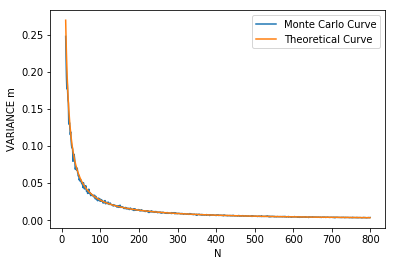

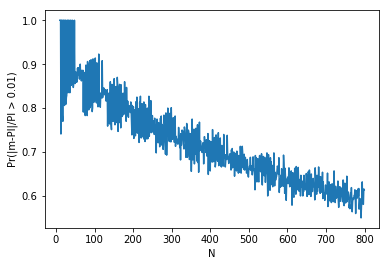

In [7]:
import random
import matplotlib.pyplot as plt

pi = 3.14159265359

s = 4
max_num_trials = 800
min_num_trials = 10
num_trials = 1000
num_inside = 0 # expect num_inside ~ num_trials*pi/4
rel_error = 0.01

num_of_means = 1000
var = []
pr_rel_error = []
N = range(min_num_trials, max_num_trials)

for i in range(min_num_trials, max_num_trials): 
    mean_m = 0
    mean_m_squared = 0
    pr_rel_error_tmp = 0
    for j in range(0, num_of_means):
        m = 0
        m_squared = 0
        num_trials = i+1
        num_inside = 0
        for k in range(num_trials):
            x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
            if x**2 + y**2 < 1.0:
                num_inside += 1
                m += s      
        m /= num_trials
        if abs(m-pi)/pi > 0.01 :
            pr_rel_error_tmp+=1
        mean_m += m
        mean_m_squared += m*m
          
    mean_m /= num_of_means
    mean_m_squared /= num_of_means        
    pr_rel_error_tmp /= num_of_means    
    var.append(mean_m_squared - mean_m*mean_m)
    pr_rel_error.append(pr_rel_error_tmp)

var_the = []
for i in range(min_num_trials, max_num_trials):
    var_the.append(exp_var(i))
        
plt.plot(N,var, label='Monte Carlo Curve')
plt.plot(N,var_the, label='Theoretical Curve')
plt.legend(loc='upper right')
plt.xlabel('N')
plt.ylabel('VARIANCE m')
plt.show() 

plt.plot(N, pr_rel_error)
plt.xlabel('N')
plt.ylabel('Pr(|m-PI|/PI > 0.01)')
plt.show()
